##Fake News Prediction

###Set up Kaggle

In [1]:
!pip install kaggle

import os
from google.colab import files

# Upload your kaggle.json file
print("Please upload your Kaggle API token (kaggle.json)")
files.upload()

# Move the kaggle.json file to the appropriate location
os.makedirs('/root/.kaggle', exist_ok=True)
os.system('mv kaggle.json /root/.kaggle/')
os.chmod('/root/.kaggle/kaggle.json', 600)

Please upload your Kaggle API token (kaggle.json)


Saving kaggle.json to kaggle.json


 ### Download and Extract Dataset from Kaggle

In [2]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip -o fake-and-real-news-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load and Combine Dataset

In [5]:
# Load fake news data
fake_df = pd.read_csv("Fake.csv")
fake_df['label'] = 1

In [6]:
# Load real news data
real_df = pd.read_csv("True.csv")
real_df['label'] = 0

In [7]:
# Combine datasets
df = pd.concat([fake_df, real_df], ignore_index=True)
print("Combined Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())

Combined Dataset Shape: (44898, 5)
First 5 Rows:
                                                title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  


### Text Preprocessing

In [8]:
stop_words = set(stopwords.words('english'))

In [11]:

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = text.split()  # Tokenization without nltk
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)  # Assuming 'text' column exists

### Split Dataset

In [12]:
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Extraction using TF-IDF

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Train Logistic Regression Model

In [14]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

### Evaluate the Model

In [18]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("🔹 Accuracy Score:", accuracy)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy Score: 0.9864142538975501
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



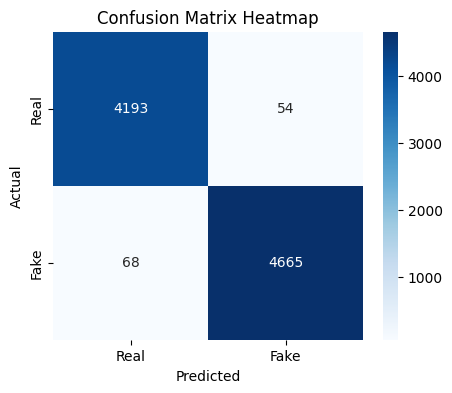

In [19]:
#Confusion Matrix
plt.figure(figsize=(5, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

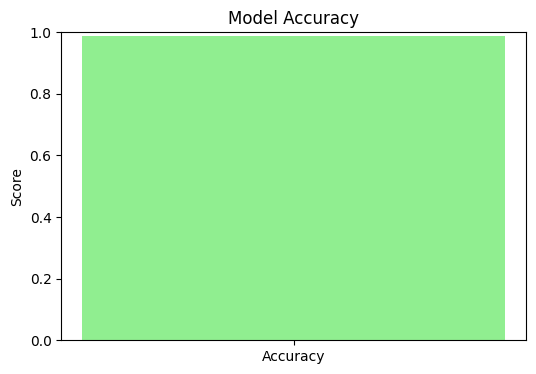

In [20]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='lightgreen')
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Accuracy")
plt.show()

### Make Predictions on New Data

In [22]:
def predict_fake_news(text):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text)
    return " Fake News" if prediction[0] == 1 else " Real News"

# Example Predictions
example_texts = [
    ("Breaking: Scientists discover a new treatment for COVID-19!", "Real"),
    ("World leaders are planning to control the economy with 5G chips.", "Fake"),
    ("NASA announces first human mission to Mars scheduled for 2035.", "Real"),
    ("Government officials have confirmed aliens exist and have made contact.", "Fake"),
    ("Stock markets see biggest surge in a decade as economy recovers.", "Real"),
    ("Secret government labs have developed mind-control technology.", "Fake"),
    ("New electric vehicle breakthrough increases battery life by 300%.", "Real"),
    ("Politicians are secretly working for a shadow organization.", "Fake")
]

print("\n Example Predictions:")
for text, actual_label in example_texts:
    predicted_label = predict_fake_news(text)
    print(f"🔹 {text} → {predicted_label} (Actual: {actual_label})")


 Example Predictions:
🔹 Breaking: Scientists discover a new treatment for COVID-19! →  Fake News (Actual: Real)
🔹 World leaders are planning to control the economy with 5G chips. →  Fake News (Actual: Fake)
🔹 NASA announces first human mission to Mars scheduled for 2035. →  Fake News (Actual: Real)
🔹 Government officials have confirmed aliens exist and have made contact. →  Fake News (Actual: Fake)
🔹 Stock markets see biggest surge in a decade as economy recovers. →  Fake News (Actual: Real)
🔹 Secret government labs have developed mind-control technology. →  Fake News (Actual: Fake)
🔹 New electric vehicle breakthrough increases battery life by 300%. →  Fake News (Actual: Real)
🔹 Politicians are secretly working for a shadow organization. →  Fake News (Actual: Fake)
